In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')

**Exploration of normality of DAILY OBX change**

[]

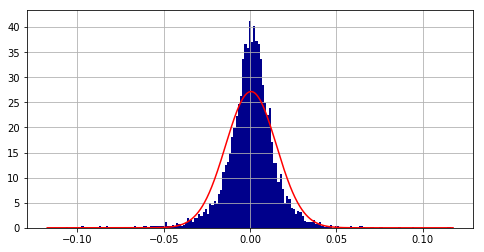

In [2]:
import scipy.stats
from scipy.stats import norm
dfOBXlast=pd.read_excel("./Data/OBXlast.xlsx")
dfOBXlast.dropna()
dfOBXlast.rename(columns={'Last':'Last Call OBX'}, inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(8,4))
dfOBXlast["Change"].hist(bins = 175, color = 'darkblue', density = True)

mean = dfOBXlast["Change"].mean()
variance = dfOBXlast["Change"].var()
sigma = dfOBXlast["Change"].std()
x = np.linspace(-sigma*8, sigma*8, 1000)

plt.plot(x,norm.pdf(x,mean,sigma), color = 'red')


plt.plot()

In [3]:
dfOBXlast.tail()

,Date,Last Call OBX,Change,1MOChange
5793,1996-01-05,79.4104,-0.003761,NaN
5794,1996-01-04,79.7102,-0.000591,NaN
5795,1996-01-03,79.7573,0.022724,NaN
5796,1996-01-02,77.9852,NaN,NaN
5797,1995-12-29,NaN,NaN,NaN


In [4]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs
kde = sm.nonparametric.KDEUnivariate(dfOBXlast["Change"].dropna())
kde.fit()
warnings.filterwarnings('ignore')

/Users/oddne/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/oddne/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/oddne/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/oddne/anaconda3/lib/python3.6/site-packages/statsmodels/sandbox/nonparametric/kernels.py:392: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  C = np.pi**(.5) * factorial(nu)**3 * self.L2Norm
/Users/oddne/anaconda3/lib/python3.6/

[]

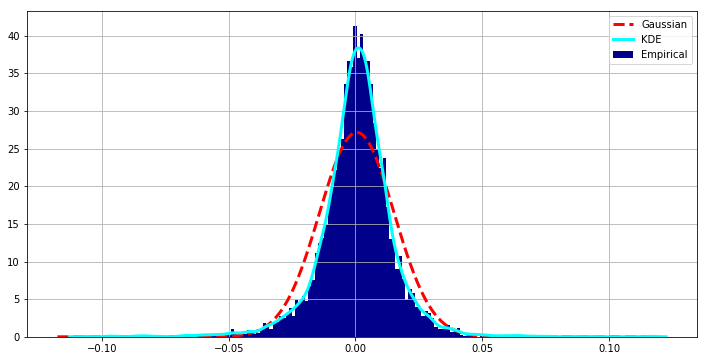

In [5]:
dfOBXlast=pd.read_excel("./Data/OBXlast.xlsx")
dfOBXlast.dropna()
dfOBXlast.rename(columns={'Last':'Last Call OBX'}, inplace=True)
fig, axes = plt.subplots(1, 1, figsize=(12,6))
dfOBXlast["Change"].hist(bins = 175, color = 'darkblue', density = True, label= "Real", ax = axes)

mean = dfOBXlast["Change"].mean()
variance = dfOBXlast["Change"].var()
sigma = dfOBXlast["Change"].std()
x = np.linspace(-sigma*8, sigma*8, 1000)

axes.plot(x,norm.pdf(x,mean,sigma),lw = 3, color = 'red',ls = '--',label ="Gaussian")
axes.plot(kde.support, kde.density, lw=3,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.legend(["Gaussian","KDE","Empirical"])
plt.plot()

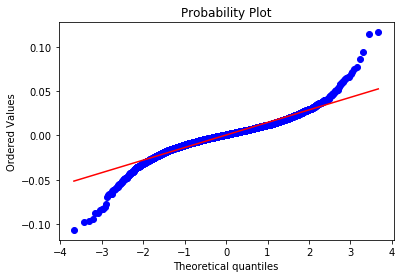

In [6]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(dfOBXlast["Change"].dropna(), dist="norm", plot = pylab)
pylab.show()

**Exploration of normality of MONTHLY OBX change**

[]

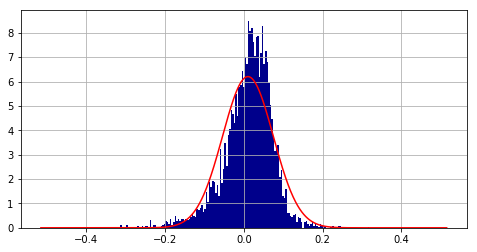

In [7]:
import scipy.stats
from scipy.stats import norm
fig, axes = plt.subplots(1, 1, figsize=(8,4))
dfOBXlast["1MOChange"].hist(bins = 175, color = 'darkblue', density = True)

mean = dfOBXlast["1MOChange"].mean()
variance = dfOBXlast["1MOChange"].var()
sigma = dfOBXlast["1MOChange"].std()
x = np.linspace(-sigma*8, sigma*8, 1000)

plt.plot(x,norm.pdf(x,mean,sigma), color = 'red')


plt.plot()

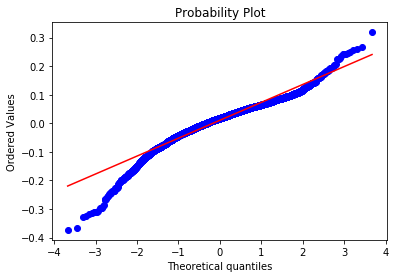

In [8]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(dfOBXlast["1MOChange"].dropna(), dist="norm", plot = pylab)
pylab.show()

In [9]:
from scipy import stats
stats.normaltest(dfOBXlast["1MOChange"].dropna())

NormaltestResult(statistic=999.9788466149084, pvalue=7.200330770023066e-218)

[]

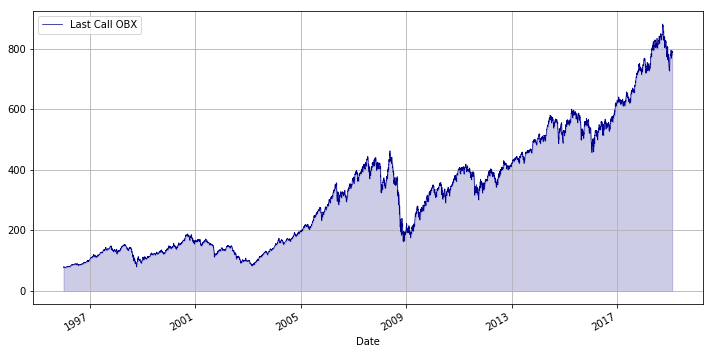

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
dfOBXlast.plot("Date","Last Call OBX", color = 'darkblue', ax = axes, legend ="Last Call", grid = True, linewidth = 0.7)
plt.fill_between(dfOBXlast["Date"].values,dfOBXlast["Last Call OBX"].values, 0, color = "darkblue",alpha=0.2)
plt.plot()

**Empirical V@R OBX**

In [11]:
quantile1d = np.quantile(dfOBXlast["Change"].dropna(),0.01)
quantile1d
quantile1m = np.quantile(dfOBXlast["1MOChange"].dropna(),0.01)
quantile1m

-0.19481990584363312

In [12]:
dfOBXlast["Next Day V@R"] = dfOBXlast["Last Call OBX"]*(1+quantile1d)
dfOBXlast["Next Month V@R"] = dfOBXlast["Last Call OBX"]*(1+quantile1m)

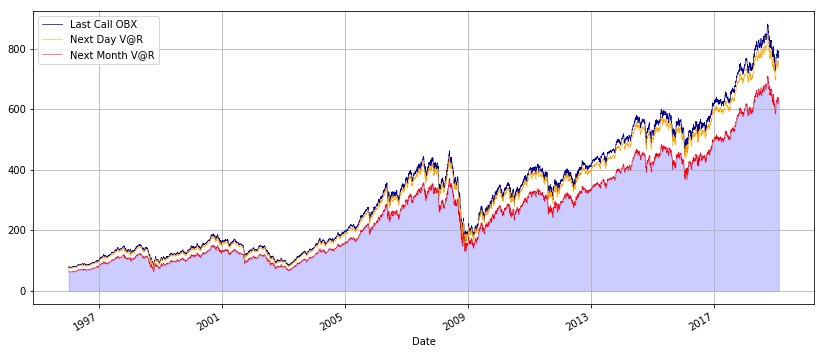

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
dfOBXlast.plot("Date","Last Call OBX", color = 'darkblue', ax = axes, linewidth = 0.7)
dfOBXlast.plot("Date","Next Day V@R", color = 'orange', ax = axes,linewidth=0.5)
dfOBXlast.plot("Date","Next Month V@R", color = 'red', ax = axes,linewidth=0.5)
plt.fill_between(dfOBXlast["Date"].values,dfOBXlast["Next Month V@R"].values, 0, color = "blue",alpha=0.2)
plt.grid()
plt.show()

In [14]:
dfOBXlast["Next Month V@R"].index

RangeIndex(start=0, stop=5798, step=1)

**Proof of non-convexity**

In [22]:
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

comp1 = "IBM"
comp2 = "UNH"

# download dataframe
data = pdr.get_data_yahoo(comp1, start="2000-01-01", end="2018-12-30")

# download Panel
data = pdr.get_data_yahoo([comp1, comp2], start="2000-01-01", end="2018-12-30")

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  2 of 2 downloaded


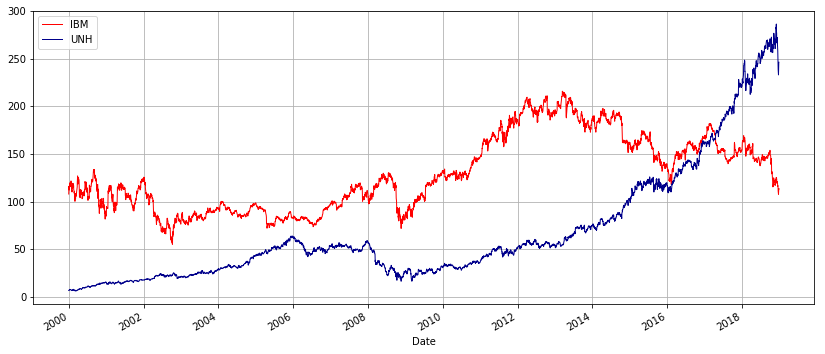

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
data["Close"].plot(ax = axes, grid = True, color = ["red","darkblue"], linewidth =1)
plt.show()

In [24]:
dataClose = data["Close"]

In [25]:
dataClose["Change" + comp1] = np.append(0,(dataClose[comp1]["2000-01-03":"2018-12-28"].values - dataClose[comp1]["1999-12-31":"2018-12-27"].values)
          /dataClose[comp1]["1999-12-31":"2018-12-27"].values)
warnings.filterwarnings('ignore')

In [26]:
dataClose["Change"+comp2] = np.append(0,(dataClose[comp2]["2000-01-03":"2018-12-28"].values - dataClose[comp2]["1999-12-31":"2018-12-27"].values)
                                  /dataClose[comp2]["1999-12-31":"2018-12-27"].values)
warnings.filterwarnings('ignore')

In [27]:
delta = np.arange(0,1.001,0.001)
ratiocomp1 = dataClose[comp2]["1999-12-31"]/((dataClose[comp1]["1999-12-31"]+dataClose[comp2]["1999-12-31"]))
r1 = ratiocomp1/(dataClose[comp1]["1999-12-31"]*ratiocomp1)*100
ratiocomp2 = dataClose[comp1]["1999-12-31"]/(dataClose[comp2]["1999-12-31"]+dataClose[comp1]["1999-12-31"])
r2 = ratiocomp2/(dataClose[comp1]["1999-12-31"]*ratiocomp1)*100
#ratiocomp1 = ratiocomp1/(ratiocomp1*dataClose[comp1]["1999-12-31"])
#ratiocomp2 = ratiocomp2/(ratiocomp1*dataClose[comp1]["1999-12-31"])
for i in delta:
    dataClose[i] = i*r1*dataClose[comp1] + (1-i)*r2*dataClose[comp2]
    dataClose["Change"+str(i)] = np.append(0,(dataClose[i]["2000-01-03":"2018-12-28"].values - dataClose[i]["1999-12-31":"2018-12-27"].values)
                                  /dataClose[i]["1999-12-31":"2018-12-27"].values)

In [21]:
#dataClose

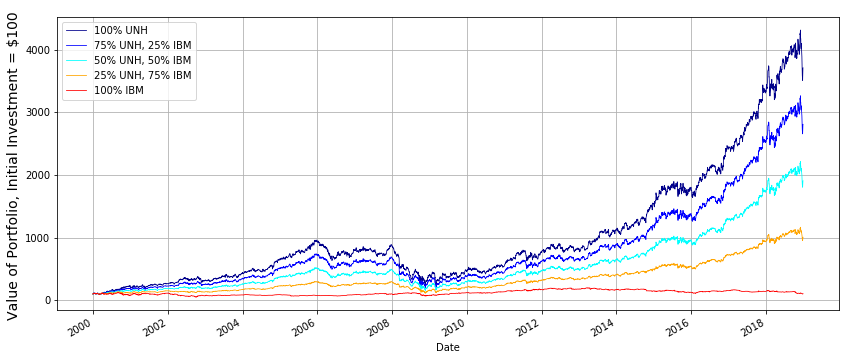

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
axes.grid(True)
dataClose[0].plot(ax = axes, grid = True,color = "darkblue", linewidth = 0.8, label = "100% UNH")
dataClose[0.25].plot(ax = axes, grid = True,color = "blue",linewidth = 0.8, label = "75% UNH, 25% IBM")
dataClose[0.5].plot(ax = axes, grid = True,color ='cyan',linewidth = 0.8,label = "50% UNH, 50% IBM")
dataClose[0.75].plot(ax = axes, grid = True,color = 'orange',linewidth = 0.8,label = "25% UNH, 75% IBM")
dataClose[1].plot(ax = axes, grid = True,color = "red",linewidth = 0.8, label = "100% IBM")
axes.legend(loc=2)
axes.set_ylabel("Value of Portfolio, Initial Investment = $100 ", size = 14)
plt.show()

In [23]:
alpha = 0.2

In [24]:
quantiles = np.zeros((0,1000))
for i in delta:
    quantiles = np.append(quantiles,np.quantile(dataClose["Change"+str(i)].values,alpha))

In [25]:
quantcomp1 = np.quantile(dataClose["Change"+comp1].values,alpha)
quantcomp2 = np.quantile(dataClose["Change"+comp2].values,alpha)

In [26]:
deltaquant = []
for i in delta:
    deltaquant.append(i*quantcomp1+(1-i)*quantcomp2)

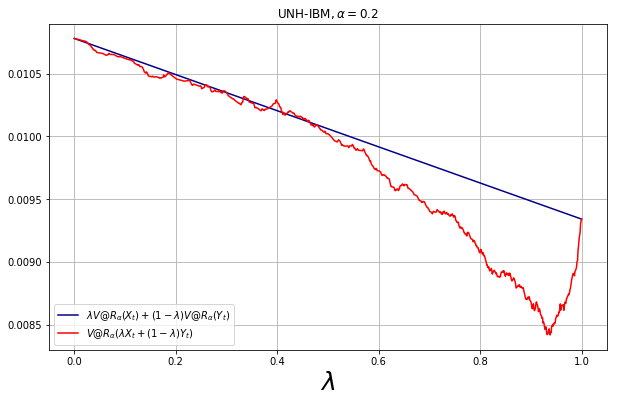

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.grid(True)
axes.plot(delta,[ -x for x in deltaquant], color = "darkblue", label = r'$\lambda V@R_{\alpha}(X_{t}) + (1-\lambda )V@R_{\alpha}(Y_{t})$')
axes.plot(delta,[ -x for x in quantiles], color = 'red', label = r'$V@R_{\alpha} (\lambda X_{t}+(1-\lambda )Y_{t})$')
axes.set_xlabel('$\lambda$', size = 25)
axes.legend(loc=3)
plt.title(comp2+"-"+comp1+r'$, \alpha = $'+str(alpha))
plt.savefig("./Plots/V@R-"+comp2+"-"+comp1)
plt.show()

**AV@R**

In [28]:
yf.pdr_override() # <== that's all it takes :-)

comp1 = "IBM"

# download dataframe
data = pdr.get_data_yahoo(comp1, start="2000-01-01", end="2018-12-30")

[*********************100%***********************]  1 of 1 downloaded


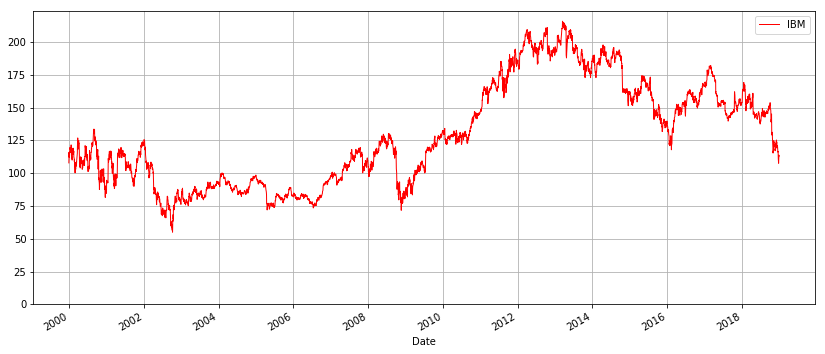

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(14,6))
data["Close"].plot(ax = axes, grid = True, color = ["red","darkblue"], linewidth =1)
plt.legend([comp1])
plt.ylim(bottom=0)
plt.show()

In [30]:
dataClose = data["Close"]

In [31]:
Change = np.append(0,(dataClose["2000-01-03":"2018-12-28"].values - dataClose["1999-12-31":"2018-12-27"].values)
          /dataClose["1999-12-31":"2018-12-27"].values)
warnings.filterwarnings('ignore')

In [32]:
Change

array([ 0.        ,  0.07531866, -0.03394397, ...,  0.03551175,
        0.02145615, -0.00659167])

[]

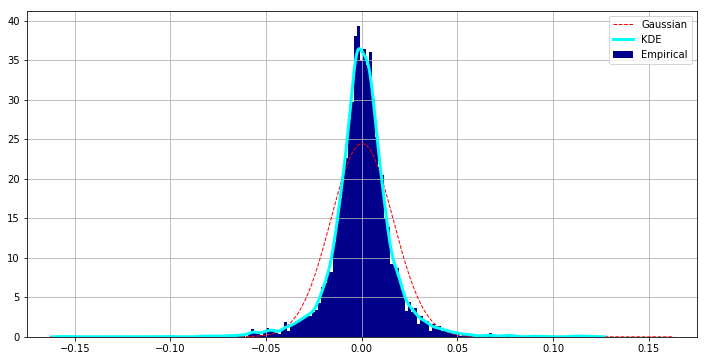

In [33]:
kde = sm.nonparametric.KDEUnivariate(Change)
kde.fit()
fig, axes = plt.subplots(1, 1, figsize=(12,6))
plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real")
plt.grid(True)
plt.xlim([-0.175,0.175])

mean = np.mean(Change)
variance = np.var(Change)
sigma = np.std(Change)
x = np.linspace(-sigma*10, sigma*10, 1000)

axes.plot(x,norm.pdf(x,mean,sigma),lw = 1, color = 'red',ls = '--',label ="Gaussian")
axes.plot(kde.support, kde.density, lw=3,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.legend(["Gaussian","KDE","Empirical"])
plt.plot()

[]

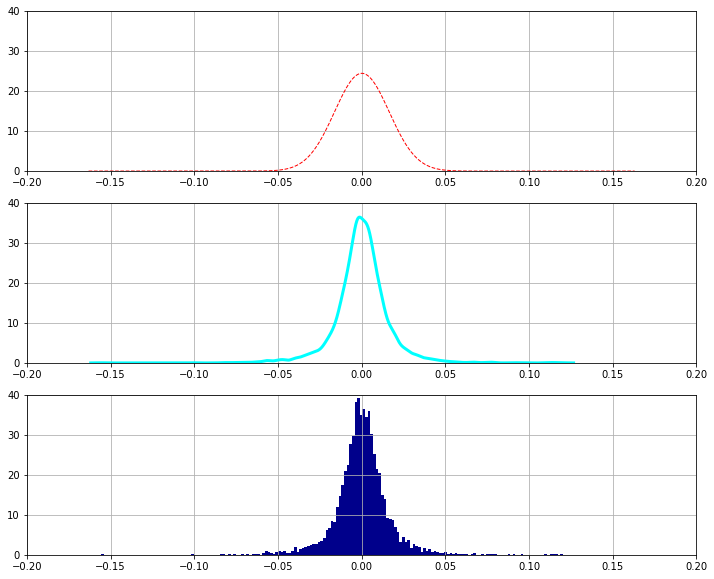

In [34]:
kde = sm.nonparametric.KDEUnivariate(Change)
kde.fit()
fig, axes = plt.subplots(3, 1, figsize=(12,10))
axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)
axes[1].set_xlim([-0.2,0.2])
axes[0].set_xlim([-0.2,0.2])
axes[2].set_xlim([-0.2,0.2])

axes[1].set_ylim([0,40])
axes[0].set_ylim([0,40])
axes[2].set_ylim([0,40])

mean = np.mean(Change)
variance = np.var(Change)
sigma = np.std(Change)
x = np.linspace(-sigma*10, sigma*10, 1000)
axes[2] = plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real")
axes[0].plot(x,norm.pdf(x,mean,sigma),lw = 1, color = 'red',ls = '--',label ="Gaussian")
axes[1].plot(kde.support, kde.density, lw=3,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.plot()

In [35]:
import bisect
quantind = bisect.bisect(kde.cdf,0.05)

[]

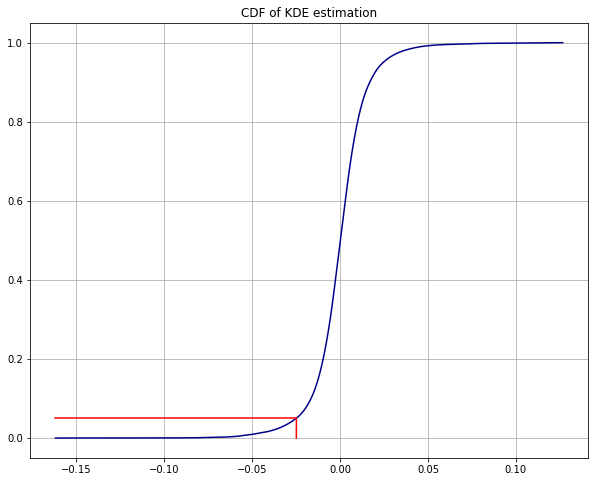

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
plt.plot(kde.support,kde.cdf, color = 'darkblue')
plt.plot([kde.support[quantind],kde.support[quantind+1]],[0,kde.cdf[quantind]], color = 'red')
plt.plot([kde.support[0],kde.support[quantind]],[0.05,0.05], color = 'red')
plt.grid(True)
plt.title("CDF of KDE estimation")
plt.plot()

[]

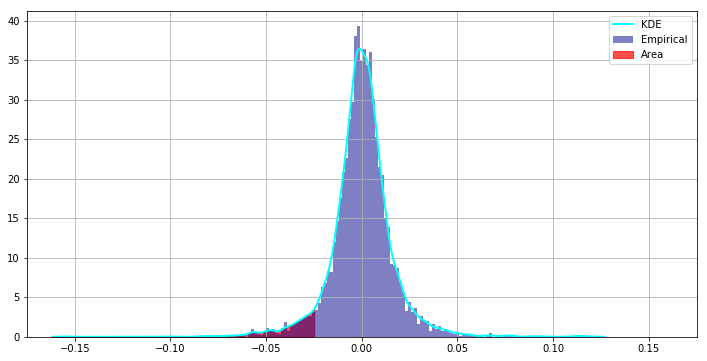

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real", alpha = 0.5)
axes.plot(kde.support, kde.density, lw=2,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.fill_between(kde.support[0:quantind],kde.density[0:quantind],0, color = "red",alpha=0.7)
plt.legend(["KDE","Empirical","Area"])
axes.set_xlim([-0.175,0.175])
plt.grid(True)
plt.plot()

In [38]:
AVAR=np.trapz(kde.support[0:quantind],kde.cdf[0:quantind])/0.05

[]

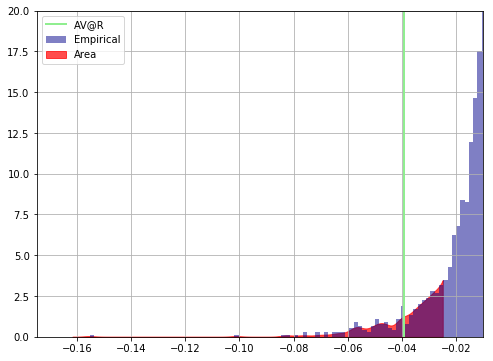

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))
plt.hist(Change ,bins = 175, color = 'darkblue', density = True, label= "Real", alpha = 0.5)
#axes.plot(kde.support, kde.density, lw=2,color = 'cyan', ls ='-', zorder=10, label ="KDE")
plt.fill_between(kde.support[0:quantind],kde.density[0:quantind],0, color = "red",alpha=0.7)
axes.plot([AVAR,AVAR],[0,20], color = 'lightgreen', lw = 2)
plt.legend(["AV@R","Empirical","Area"])
axes.set_xlim([-0.175,-0.01])
axes.set_ylim([0,20])
plt.grid(True)
plt.plot()